In [65]:
# import Library

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import datasets


In [66]:
df = pd.read_csv('./USA_Housing.csv')

# print(df.head())
print(df.shape)
# df.dropna(0)
df.describe()
# df.isnull().sum()
# sns.heatmap(df.corr(), annot = True, cmap = 'cool')
# plt.show()

(5000, 7)


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [67]:
mu = np.array(df.mean()[:-1])
print(mu)

[6.85831090e+04 5.97722204e+00 6.98779185e+00 3.98133000e+00
 3.61635160e+04]


C:\Users\MRHAI~1\AppData\Local\Temp/ipykernel_5240/3757251929.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mu = np.array(df.mean()[:-1])


In [68]:


X = np.array(df.iloc[:, :-2])
X = (X - mu) / X.shape[0]

X = np.concatenate((np.ones((X.shape[0],1)), X), 1)

y = np.array(df.iloc[:, -2])

# print(X)
print(y)

[1059033.55787012 1505890.91484695 1058987.98787608 ... 1030729.58315229
 1198656.87240769 1298950.48026696]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# print(X_train)
print(X_train.shape)

y_train = np.array([y_train]).T
# print(y_train.shape)

(4000, 6)


In [70]:
# theta
w = np.zeros((X.shape[1], 1))
# print(w)
# print(w.shape)

In [71]:
print( ( X_train.dot(w) ) .shape)

(4000, 1)


In [72]:
# c = np.zeros((X.shape[1], X.shape[1]))
# c[0][0] = 1

# for i in range(1,X.shape[1]): 
#     c[i][i] = i
# print(c)

In [73]:
iter = 1000
lr = 0.
01 #alpha
res_train = []
res_test = []


for i in range(iter):    
    # model 
    w = w - lr / X_train.shape[0] * X_train.T.dot(  X_train.dot(w) - y_train  )

    y_pred = X_train.dot(w)
    # j train result
    res_train.append( mean_squared_error(y_train, y_pred)/ (2 * X_train.shape[0]) )
    
    y_pred = X_test.dot(w)

    res_test.append( mean_squared_error(y_test, y_pred) / (2 * X_test.shape[0]) )

In [74]:
# theta matrix
print(w)

[[1.23051102e+06]
 [1.08118146e+05]
 [3.21517079e+02]
 [2.42443937e+02]
 [1.43782472e+02]
 [7.55448433e+04]]


In [75]:
# print(res_train)
# print(res_test)

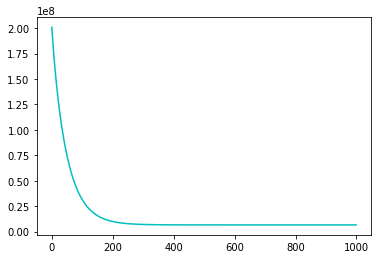

In [76]:
plt.plot(res_train, 'c')

In [77]:
print(res_train[-1:])

[6507141.112979754]


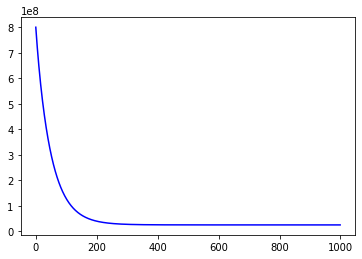

In [78]:
plt.plot(res_test, 'b')

In [79]:
print(res_test[-1:])

[25312077.423243873]
